# Problem statement

## Medical Charges Prediction and Analysis
About the Dataset
This dataset is dedicated to the cost of treatment of different patients. The cost of treatment depends on
many factors: diagnosis, type of clinic, city of residence, age and so on. There is no data on the diagnosis of
patients. But other information is available that can help us to make a conclusion about the health of patients
and practice regression analysis.

## Columns
• age: age of primary beneficiary
• sex: insurance contractor gender, female, male
• bmi: Body mass index, providing an understanding of body, weights that are relatively high or low
relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight,
ideally 18.5 to 24.9
• children: Number of children covered by health insurance / Number of dependents
• smoker: Smoking
• region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
• charges: Individual medical costs billed by health insurance

## Use case tasks (for directions purpose only):
• How is the distribution of various properties based on gender?
• Perform hypothesis testing to check whether having children more children results in the fact that
people smoke less?
• Which variable do you think effect the charges the most and why (prove it).
• What can you say about the difference in distribution of charges for smokers and non smokers.
• How is BMI affecting the distribution of charges.
• Plot the region wise distribution of charges based on other variables and draw the insights.
• Make a well performing model predicting the charges based on the various other variables.

## System design tasks (for directions purpose only):
• Design system architecture to deploy this Regression ML Model in production
• How do you perform canary build?
• What should be the strategy for ML Model Monitoring?
• How do you perform load and stress testing?
• How do you track, monitor and audit ML training?
• Design framework for continuous delivery and automation of machine learning tasks.



# Import ML/Python Libraries 

Python3 version 3.10.6 and ML/Python Libraries are used for data analysis and analytics. ML/Python Libraries are pandas, numpy, seaborn, networkx, matplotlib, scipy, sklearn.

##### Uncomment the below code to install the required ML/Python Libraries
#! pip install pandas, numpy, seaborn, matplotlib, scipy, sklearn



In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder



# set display option
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# ignore warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Utility functions

In [2]:
# Feature selection of the given dataset for model building
def feature_ranking(X, Y, colnames):
    '''
    This function is used to select relevant features for the machine learning model. 
    Feature Selection is the method of reducing the input variable to the model by using 
    only relevant data and getting rid of noise in data. 
    Input:
        X: Predictor variable
        Y: Label/target variable
        colnames: Name of the predictor variable
    
    Output:
        
        meanplot: Mean ranking of the predictor variable for features selection/ranking
    
    '''
    # Define dictionary to store our rankings
    ranks = {}
    # Create our function which stores the feature rankings to the ranks dictionary
    def ranking(ranks, names, order=1):
        minmax = MinMaxScaler()
        ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
        ranks = map(lambda x: round(x,2), ranks)
        return dict(zip(names, ranks))

    # Construct Recursive Feature Elimination (RFE) of the Linear Regression model
    lr = LinearRegression()
    lr.fit(X,Y)

    #stop the search when only the last feature is left
    rfe = RFE(lr, n_features_to_select=1, ) #verbose =3
    rfe.fit(X,Y)
    ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

    # Decision Tree Regressor
    dt = DecisionTreeRegressor()
    dt.fit(X,Y)
    ranks["DT"] = ranking(dt.feature_importances_, colnames)

    # Random Forest Regressor
    rf = RandomForestRegressor(n_jobs=-1, n_estimators=9, ) #verbose=3
    rf.fit(X,Y)
    ranks["RF"] = ranking(rf.feature_importances_, colnames)

    """ Creating the Feature Ranking Matrix: We combine the scores from the various methods above and output 
    it in a matrix form for convenient viewing as such:"""

    # Create empty dictionary to store the mean value calculated from all the scores
    r = {}
    for name in colnames:
        r[name] = round(np.mean([ranks[method][name] for method in ranks.keys()]), 2)


    methods = sorted(ranks.keys())
    ranks["Mean"] = r
    methods.append("Mean")

    # Put the mean scores into a Pandas dataframe
    meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

    # Sort the dataframe
    meanplot = meanplot.sort_values('Mean Ranking', ascending=False)
    
    return meanplot

# Load Medical Charges Prediction Dataset and Data understanding

This section details the data understanding and preparation of the Medical Charges Prediction Dataset. 

Performed the data understanding by printing a few rows of the dataframe and checked the missing values and data type etc. of the Medical Charges Prediction Dataset.


In [3]:
# Read the .CSV file
trainDf = pd.read_csv("data.csv")

# print first five rows of the trainDf 
trainDf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# print the info of train dataframe
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Check the missing values
trainDf.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
trainDf.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Print the duplicate_records
duplicate_records = trainDf[trainDf.duplicated()]
print("Duplicate Records:")
duplicate_records

Duplicate Records:


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
# remove duplicates
trainDf.drop_duplicates(inplace=True)


# Exploratory Data Analysis (EDA)
This section discovers the trends and patterns in the dataset and understands the relationship between various variables.

Exploratory Data Analysis (EDA) is an approach we used to analyse the data using visual techniques. EDA is used to check assumptions with the help of statistical summaries.

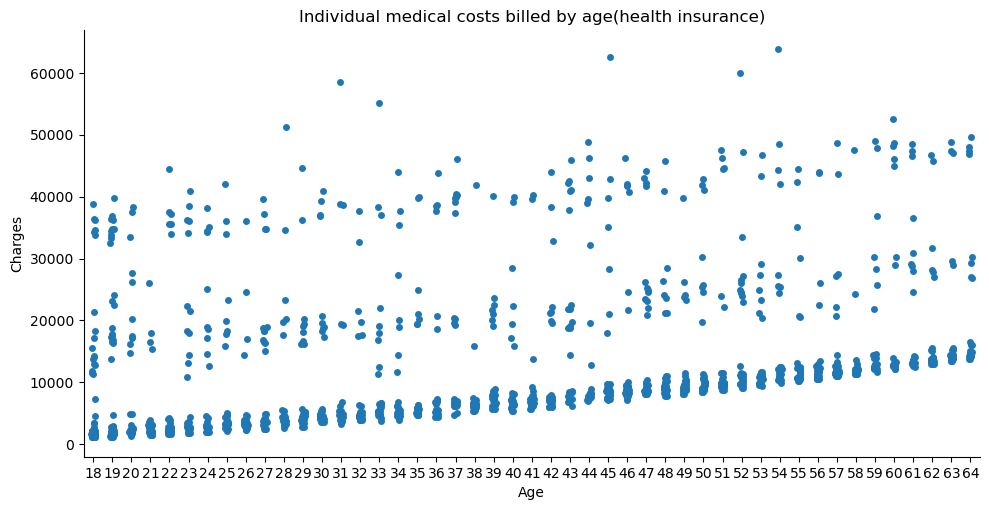

In [9]:
# Individual medical costs billed by age(health insurance)
sns.catplot(x="age", y="charges", data=trainDf, jitter=True, height=5,aspect=2)
plt.title("Individual medical costs billed by age(health insurance)")
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

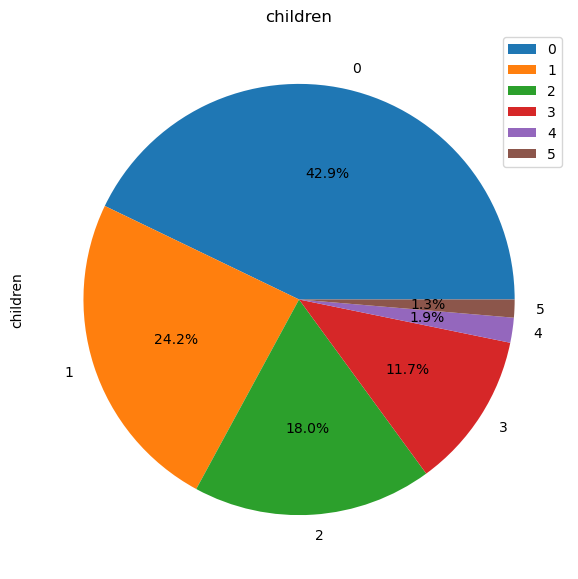

In [10]:
# children-wise distribution in percentage 
(trainDf.groupby('children')['children'].count()).plot.pie(autopct='%1.1f%%',figsize=(9,7), legend = True)
plt.title("children")
plt.show()

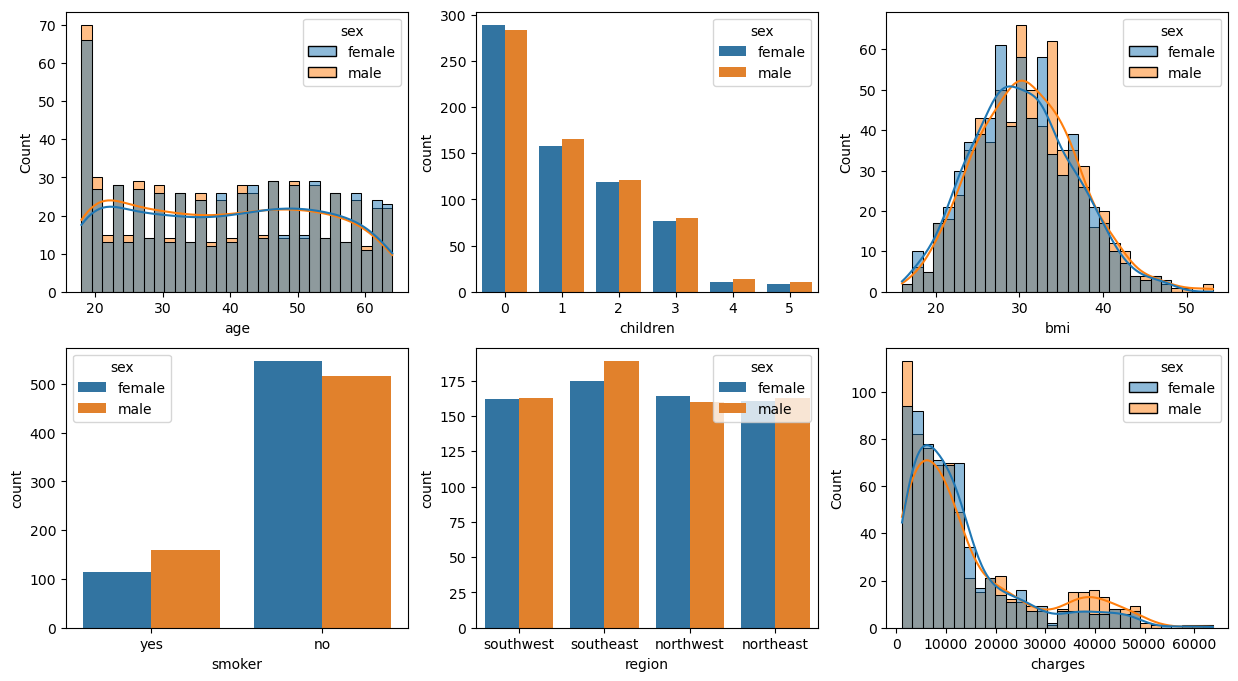

In [12]:
# Plotting the distribution of various properties based on gender
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
sns.histplot(data=trainDf, x='age', hue='sex', kde=True, bins=30)

plt.subplot(2, 3, 2)
sns.countplot(data=trainDf, x='children', hue='sex')

plt.subplot(2, 3, 3)
sns.histplot(data=trainDf, x='bmi', hue='sex', kde=True, bins=30)

plt.subplot(2, 3, 4)
sns.countplot(data=trainDf, x='smoker', hue='sex')

plt.subplot(2, 3, 5)
sns.countplot(data=trainDf, x='region', hue='sex')

plt.subplot(2, 3, 6)
sns.histplot(data=trainDf, x='charges', hue='sex', kde=True, bins=30)

plt.show()


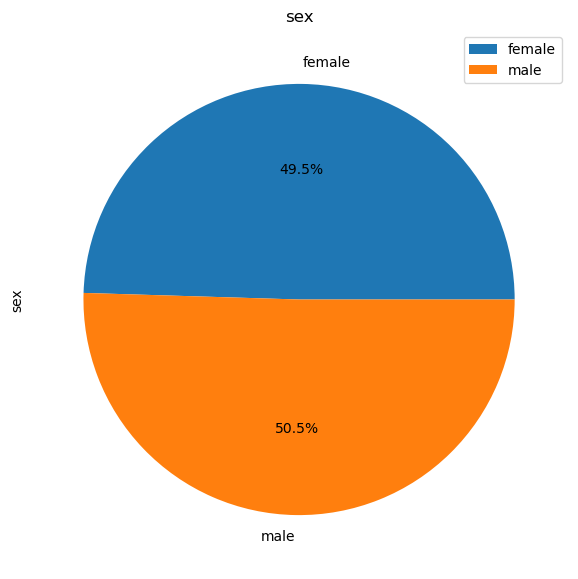

In [13]:
# Gender-wise distribution in percentage 
(trainDf.groupby('sex')['sex'].count()).plot.pie(autopct='%1.1f%%',figsize=(9,7), legend = True)
plt.title("sex")
plt.show()


In [14]:
## Hypothesis Testing on Smoking and Number of Children:

from scipy.stats import ttest_ind

# Hypothesis testing: Does having more children result in people smoking less?
children_smokers = trainDf[trainDf['smoker'] == 'yes']['children']
no_children_smokers = trainDf[trainDf['smoker'] == 'no']['children']

t_stat, p_value = ttest_ind(children_smokers, no_children_smokers)
print(f'T-statistic: {t_stat}, p-value: {p_value}')


T-statistic: 0.267872851014335, p-value: 0.7888385727704449


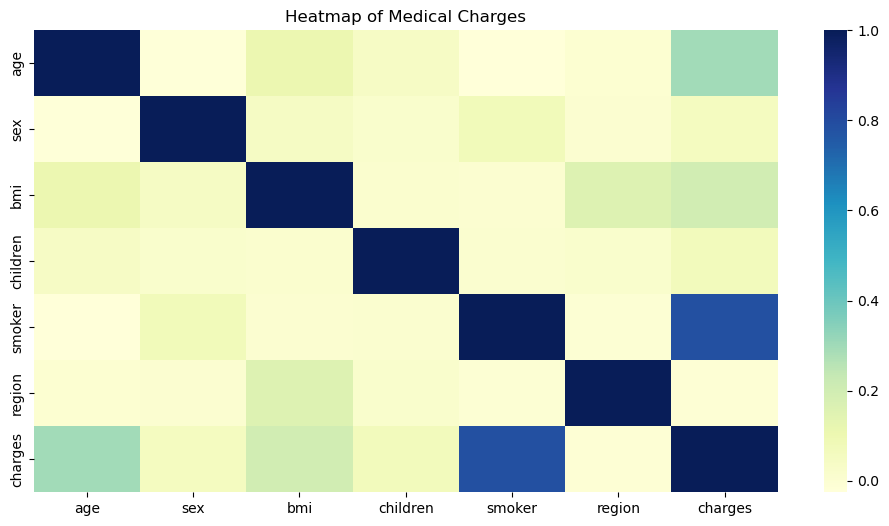

In [48]:
# Identify the Variable Affecting Charges the Most:

f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(trainDf.corr(), cmap="YlGnBu")
plt.title("Heatmap of Medical Charges")

# displaying heatmap
plt.show()

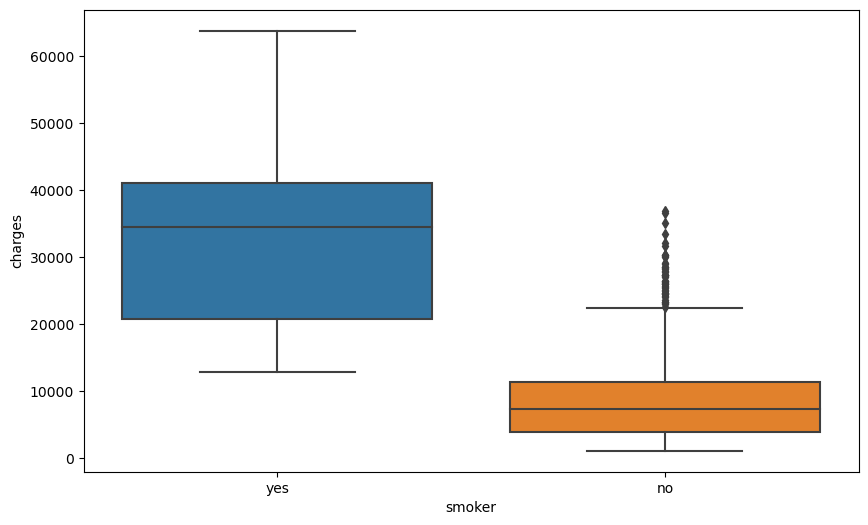

In [16]:
# Distribution of charges for smokers and non-smokers
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=trainDf)
plt.show()


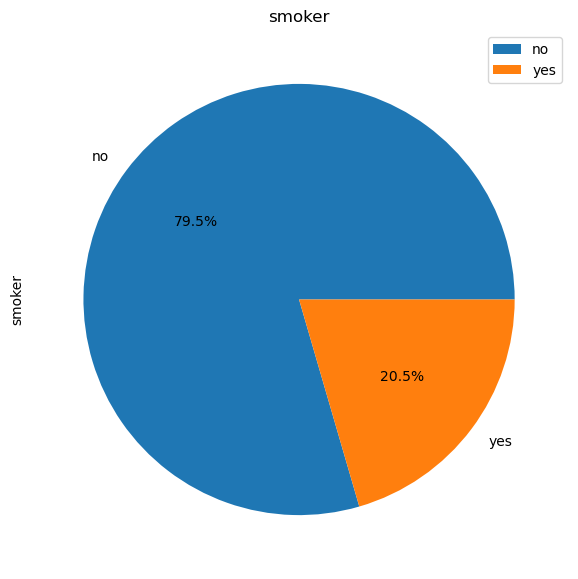

In [17]:
# smoker-wise distribution in percentage 
(trainDf.groupby('smoker')['smoker'].count()).plot.pie(autopct='%1.1f%%',figsize=(9,7), legend = True)
plt.title("smoker")
plt.show()

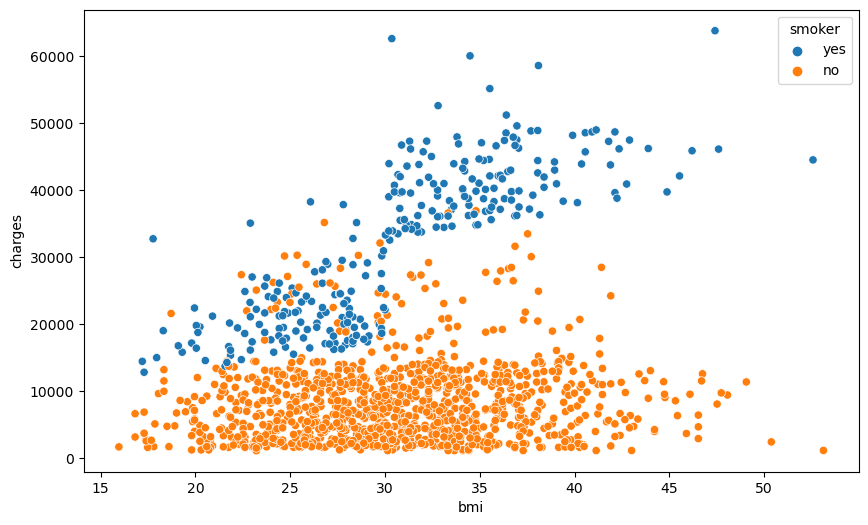

In [18]:
# Effect of BMI on the distribution of charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=trainDf)
plt.show()


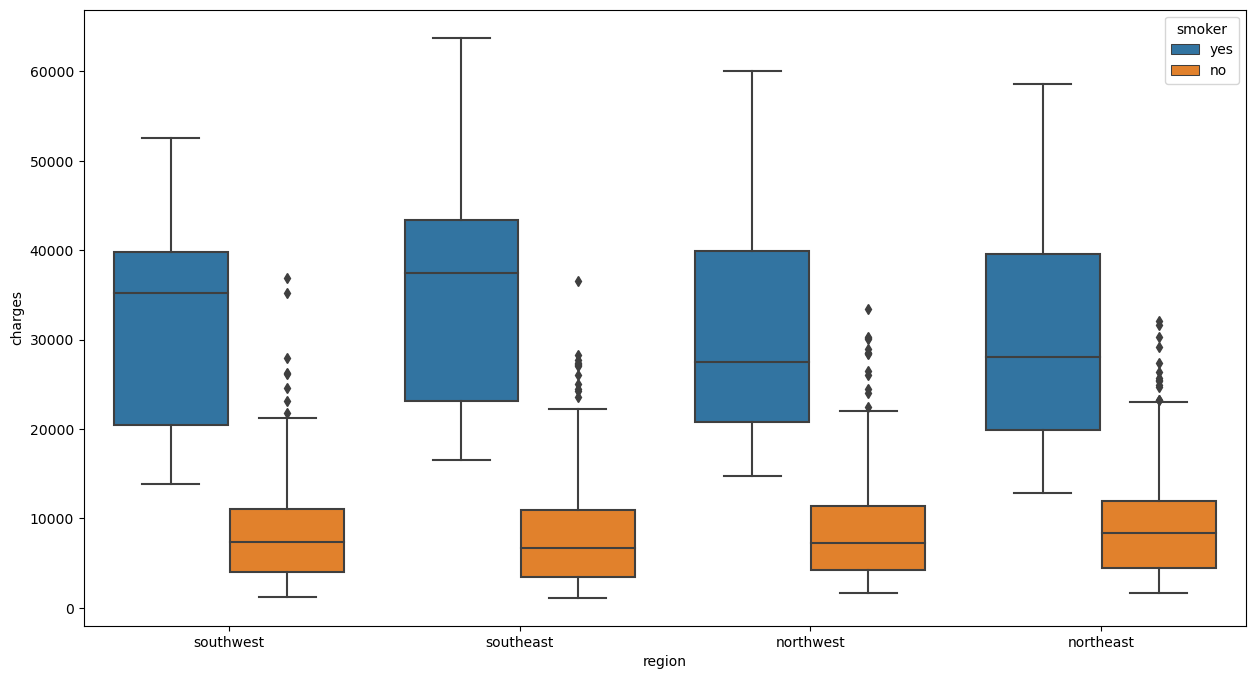

In [19]:
# Region-wise distribution of charges based on other variables
plt.figure(figsize=(15, 8))
sns.boxplot(x='region', y='charges', hue='smoker', data=trainDf)
plt.show()


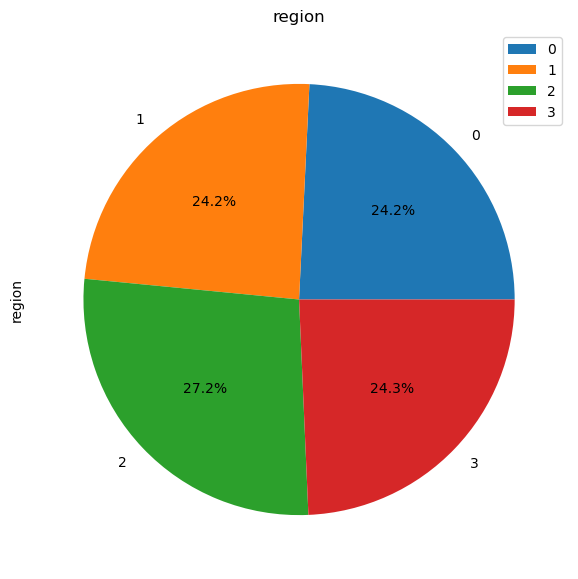

In [31]:
# region-wise distribution in percentage 
(trainDf.groupby('region')['region'].count()).plot.pie(autopct='%1.1f%%',figsize=(9,7), legend = True)
plt.title("region")
plt.show()

# Feature Engineering

In [20]:
# Perform label encoding for object columns
label_encoder = LabelEncoder()

# Iterate through columns and encode if the dtype is 'object'
for column in trainDf.columns:
    if trainDf[column].dtype == 'object':
        trainDf[column] = label_encoder.fit_transform(trainDf[column])

# Now, the object columns are encoded. You can print the updated information.
trainDf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 67.9 KB


In [21]:
trainDf

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# Significant Feature Ranking
This section details the importance of features for robust machine learning model building. Feature selection is the method of reducing the input variable to the model by using only relevant data and getting rid of noise in the data. 

Build the python function for features ranking name called feature_ranking(). This function is used to select relevant features for the machine learning model. feature_ranking() takes the input as X- Predictor variable, Y - Label/target variable and colnames - Name of the predictor variable. feature_ranking() return the result as the meanplot - mean ranking of the predictor variable for features selection/ranking.

feature_ranking() method can be used as feature selection, variable selection, attribute selection or variable subset selection. In another word, feature selection is the process of selecting a subset of relevant features for use in model construction.

The following plot shows the mean ranking of features of theMedical Charges prediction dataset


In [32]:
# Extract the input variable and target variable from trainDf
X = trainDf.drop(['charges'],  axis=1)

Y = trainDf[['charges']]

# Store the column/feature names into a list "colnames"
colnames = list(X.columns)

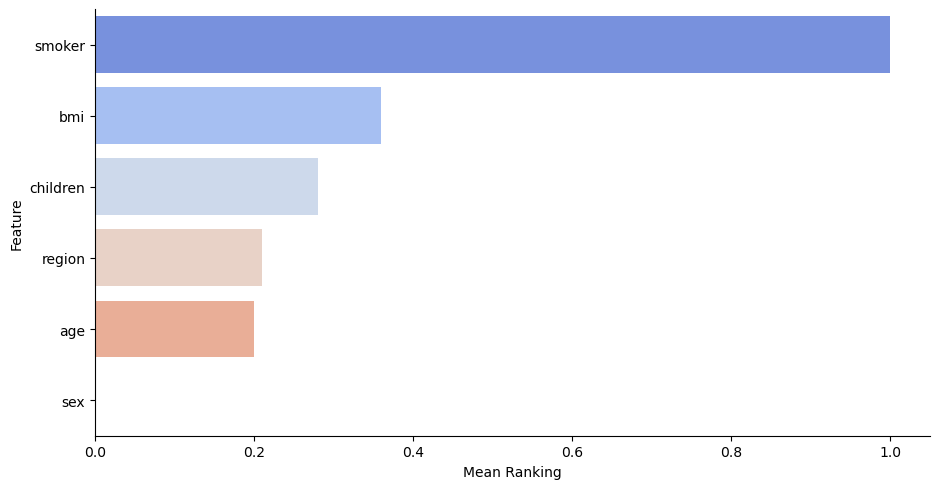

In [33]:
# Plot the ranking of the features
meanplot = feature_ranking(X,Y, colnames)

sns.catplot(x="Mean Ranking", y="Feature", data=meanplot, kind="bar", height=5, aspect=1.9, palette='coolwarm')


In [34]:
# sort the mean ranking of the features
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)
meanplot

,Feature,Mean Ranking
4,smoker,1.00
2,bmi,0.36
3,children,0.28
5,region,0.21
0,age,0.20
1,sex,0.00


In [35]:
# select the features based on Mean Ranking for model training
columnName = meanplot.loc[meanplot['Mean Ranking']  >= 0.20]
columnName = list(columnName.Feature)
print("No of Feature: ", len(columnName))
print("Columns Name: ", columnName)

No of Feature:  5
Columns Name:  ['smoker', 'bmi', 'children', 'region', 'age']


# Choosing machine learning algorithms for model training

Choosing machine learning algorithms for model training is one of the important steps in data mining. The choice of the machine learning algorithms is based on the given problem statement.
For this linear problem statement chosen models are

1. K-Neighbors Regressor
2. linear regression
3. Random forest regressor
4. decision tree


# Model training and evaluation
This section details machine learning model building and evaluation of the models. A prepared dataset was used to train and test the ML model performance. Split the training dataset into 70:30 ratios, where  70 portions were used for the model training and 30 portions were used for the model testing. 

For model training, tried many permutations and combinations of features selection/ranking and trained and tested the chosen linear models.  Finally, the Mean ranking of the features greater than equal to 0.20 (section 4) is selected for the ML model training. 

The performance evaluation report includes the R2 Score, Mean Square Error(MSE) and Root Mean Square Error(RMSE) of the chosen ML models. The ML models performance evaluation report was sorted in descending order.


In [36]:
# Extract the input variable and target variable of the trainDF
X = trainDf[columnName]
y = trainDf[['charges']]


In [37]:
# split original data [i.e X and y] into 70:30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Create the performance report as R2 Score, Mean Square Error(MSE), Root Mean Square Error(RMSE) of the given models
model_name = []
r2_score = []
mse = []
rmse = []

def regression_report(ModelName, model_object):
    '''
    This function Create the performance evaluation report as R2 Score, Mean Square Error(MSE), Root Mean Square Error(RMSE)
    and print Regression report of the given models
    Input
        ModelName: Name of the ML model
        model_object: Object of the initialized ML model
    Output
        Print Regression report of the given models
    
    '''
    model_object.fit(X_train, y_train)
    y_test_pred = model_object.predict(X_test)
    
    model_name.append(ModelName)
    # print("Model Name:", ModelName)
    r2 = round(metrics.r2_score(y_test, y_test_pred), 4)
    r2_score.append(r2)
    # print("r2_score:", r2)
    
    MeanSquareError = round(mean_squared_error(y_test, y_test_pred), 4)
    mse.append(MeanSquareError)
    # print("Mean Square Error", MeanSquareError)
    
    RootMeanSquareError = round(math.sqrt(mean_squared_error(y_test, y_test_pred)),4)
    rmse.append(RootMeanSquareError)
    # print("Root Mean Square Error", RootMeanSquareError)
    

# Train the Linear models
linears = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
        }

for key, val in linears.items():
    regression_report(key,val)
    # print('\n')
    
# Train the Random Forest Regressor model
trees = [21,51,101]

for tree in trees:
    rf = RandomForestRegressor(n_estimators = tree)
    regression_report("Random Forest Regressor #tree: "+ str(tree), rf)
    # print('\n')

    
evaluation_poly = pd.DataFrame({'Model Name' : model_name,
                                'R squared' : r2_score,
                                'MSE' : mse,
                                'RMSE' : rmse})

evaluation_poly.sort_values(['R squared'], ascending=False, inplace = True)
print("Performance evaluation report of the models as: \n",  evaluation_poly)


Performance evaluation report of the models as: 
                            Model Name  R squared           MSE        RMSE
4   Random Forest Regressor #tree: 51     0.8659  2.294148e+07   4789.7262
3   Random Forest Regressor #tree: 21     0.8657  2.298826e+07   4794.6070
5  Random Forest Regressor #tree: 101     0.8609  2.379891e+07   4878.4125
1             Decision Tree Regressor     0.7939  3.525899e+07   5937.9283
0                   Linear Regression     0.7724  3.894551e+07   6240.6334
2               K-Neighbors Regressor     0.1014  1.537605e+08  12400.0198


# Model selection
This section details the machine learning model selection and prediction of the given testMedical Charges dataset.

According to the performance evaluation report, the Random Forest Regressor #tree: 51 model performance is better as shown in above result. Random Forest Regressor #tree: 51 is selected for further prediction and analytics. 


In [29]:
# Train the Linear Regression model
rf =  RandomForestRegressor(n_estimators = 51) #KNeighborsRegressor() #LinearRegression(normalize =True)
rf.fit(X_train, y_train)
y_test_pred = rf.predict(X_test)
    
# Print the Linear Regression model report
print("Performance evaluation report is: ")
r2 = round(metrics.r2_score(y_test, y_test_pred), 4)
print("r2_score: ", r2)
MeanSquareError = round(mean_squared_error(y_test, y_test_pred), 4)
print("Mean Square Error: ", MeanSquareError)
RootMeanSquareError = round(math.sqrt(mean_squared_error(y_test, y_test_pred)),4)
print("Root Mean Square Error: ", RootMeanSquareError)


Performance evaluation report is: 
r2_score:  0.8638
Mean Square Error:  23309312.8176
Root Mean Square Error:  4827.9719


# Observation

The overall prediction performance report of the Random Forest Regressor #tree: 51 model as R2 Score, Mean Square Error(MSE) and Root Mean Square Error(RMSE) is shown above. Over time, with training, the model gets better at predicting. 

